In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv
import scipy.stats as st
import seaborn as sns
import numpy as np

In [2]:
#File is Total alcohols by country and year, UOM Liters per Capita 
# Specify the file path
file_path = './8_Per_Capita_Consumption_Not_Separated_by_Gender_1960_2016.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,SpatialDim,ParentLocationCode,TimeDim,TimeDimensionValue,SPIRITS_PER_CAPITA,BEER_PER_CAPITA,WINE_PER_CAPITA,OTHER_ALCOHOL_PER_CAPITA,ALL_ALCOHOLS_PER_CAPITA
0,AFG,EMR,1961,1961,0.00,0.00,0.00,0,0.00
1,AFG,EMR,1962,1962,0.00,0.00,0.00,0,0.00
2,AFG,EMR,1963,1963,0.00,0.00,0.00,0,0.00
3,AFG,EMR,1964,1964,0.00,0.00,0.00,0,0.00
4,AFG,EMR,1965,1965,0.00,0.00,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...
9512,ZWE,AFR,2011,2011,0.64,4.10,0.25,0,9.34
9513,ZWE,AFR,2012,2012,0.88,4.14,0.17,0,9.54
9514,ZWE,AFR,2013,2013,0.75,4.17,0.18,0,9.73
9515,ZWE,AFR,2014,2014,0.86,4.35,0.10,0,9.94


In [3]:
# Filter the DataFrame to include only SPIRITS_PER_CAPITA data and data from 2013 to 2016
spirits_df = df[(df['TimeDimensionValue'] >= 2013) & (df['TimeDimensionValue'] <= 2016)][['ParentLocationCode', 'TimeDimensionValue', 'SPIRITS_PER_CAPITA']]

# Group the data by ParentLocationCode and TimeDimensionValue and apply aggregation functions
aggregated_df = spirits_df.groupby(['ParentLocationCode', 'TimeDimensionValue'], as_index=False)["SPIRITS_PER_CAPITA"].agg(Mean="mean", Total="sum", Count="count", Min="min", Max="max")

display(aggregated_df)

,ParentLocationCode,TimeDimensionValue,Mean,Total,Count,Min,Max
0,AFR,2013,0.450000,19.80,44,0.00,3.10
1,AFR,2014,0.393256,16.91,43,0.00,3.10
2,AFR,2015,0.320698,13.79,43,0.00,3.10
3,AFR,2016,0.480000,2.40,5,0.10,1.27
4,AMR,2013,4.808611,173.11,36,1.04,11.30
5,AMR,2014,4.428571,155.00,35,1.12,9.56
6,AMR,2015,2.347941,79.83,34,0.60,5.65
7,AMR,2016,2.099583,50.39,24,0.56,4.85
8,EMR,2013,0.510000,10.71,21,0.00,3.04
9,EMR,2014,0.548947,10.43,19,0.00,3.17


In [4]:
aggregated_df.shape

(24, 7)

In [5]:
# Calculate the rate of growth for each region based on the Mean values over the years
aggregated_df['Rate_of_Growth'] = aggregated_df.groupby('ParentLocationCode')['Mean'].pct_change() * 100

display(aggregated_df)

,ParentLocationCode,TimeDimensionValue,Mean,Total,Count,Min,Max,Rate_of_Growth
0,AFR,2013,0.450000,19.80,44,0.00,3.10,NaN
1,AFR,2014,0.393256,16.91,43,0.00,3.10,-12.609819
2,AFR,2015,0.320698,13.79,43,0.00,3.10,-18.450621
3,AFR,2016,0.480000,2.40,5,0.10,1.27,49.673677
4,AMR,2013,4.808611,173.11,36,1.04,11.30,NaN
5,AMR,2014,4.428571,155.00,35,1.12,9.56,-7.903315
6,AMR,2015,2.347941,79.83,34,0.60,5.65,-46.981973
7,AMR,2016,2.099583,50.39,24,0.56,4.85,-10.577686
8,EMR,2013,0.510000,10.71,21,0.00,3.04,NaN
9,EMR,2014,0.548947,10.43,19,0.00,3.17,7.636739


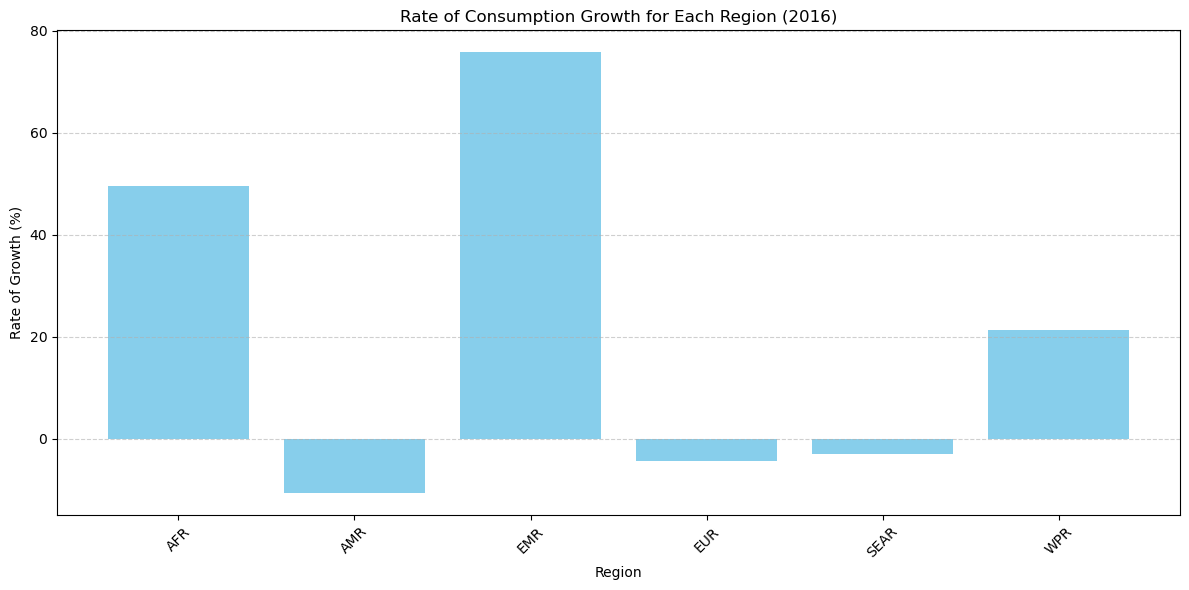

In [6]:
# Filter the DataFrame for the year 2016
df_2016 = aggregated_df[aggregated_df['TimeDimensionValue'] == 2016]

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df_2016['ParentLocationCode'], df_2016['Rate_of_Growth'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Rate of Growth (%)')
plt.title('Rate of Consumption Growth for Each Region (2016)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

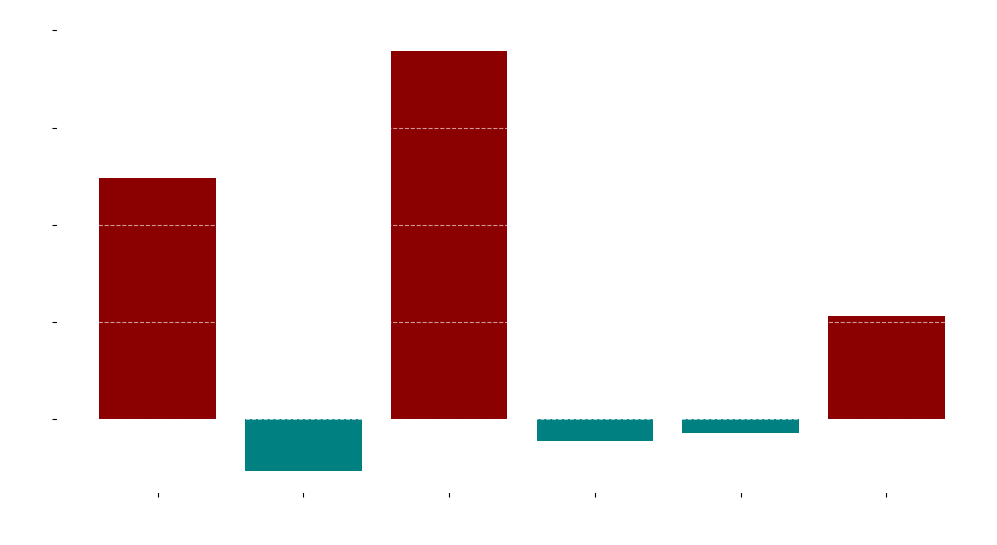

In [7]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))

# Iterate over the rate of growth values to set the color accordingly
colors = ['darkred' if rate > 0 else 'teal' for rate in df_2016['Rate_of_Growth']]

# Plotting the bars with colors based on the rate of growth
bars = plt.bar(df_2016['ParentLocationCode'], df_2016['Rate_of_Growth'], color=colors)

plt.xlabel('Region', color='white')  # Set label color to white
plt.ylabel('Rate of Growth (%)', color='white')  # Set label color to white
plt.title('Rate of Consumption Growth for Each Region (2016)', color='white')  # Set title color to white
plt.xticks(color='white')  # Set tick color to white
plt.yticks(color='white')  # Set tick color to white
plt.grid(axis='y', linestyle='--', alpha=0.6, color='white')  # Set grid line color to white

# Set color of all lines to white
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Set background color to transparent
plt.gca().set_facecolor('none')

# Save the figure as a PNG with a transparent background
plt.savefig('bar_chart.png', transparent=True)

plt.show()

In [8]:
df.shape

(9517, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SpatialDim                9517 non-null   object 
 1   ParentLocationCode        9517 non-null   object 
 2   TimeDim                   9517 non-null   int64  
 3   TimeDimensionValue        9517 non-null   int64  
 4   SPIRITS_PER_CAPITA        9517 non-null   float64
 5   BEER_PER_CAPITA           9517 non-null   float64
 6   WINE_PER_CAPITA           9517 non-null   float64
 7   OTHER_ALCOHOL_PER_CAPITA  9517 non-null   int64  
 8   ALL_ALCOHOLS_PER_CAPITA   9517 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 669.3+ KB


In [10]:
df['SpatialDim'].value_counts(normalize=True)*100

SpatialDim
DZA    0.588421
POL    0.588421
NZL    0.588421
OMN    0.588421
PAK    0.588421
         ...   
MDV    0.168120
NRU    0.157613
PRI    0.157613
MCO    0.115583
MNE    0.115583
Name: proportion, Length: 193, dtype: float64

In [11]:
# top 5 countries = >x% suggestions 

In [12]:
df['ParentLocationCode'].value_counts(normalize=True)*100

ParentLocationCode
AFR     26.279290
EUR     23.767994
AMR     19.354839
WPR     12.808658
EMR     11.989072
SEAR     5.800147
Name: proportion, dtype: float64

In [13]:
df.groupby(['ParentLocationCode'])["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

,Mean,Total,Count,Min,Max
ParentLocationCode,,,,,
AFR,0.494710,1237.270,2501,0.0,8.58
AMR,3.627780,6682.370,1842,0.0,16.56
EMR,0.593891,677.630,1141,0.0,13.40
EUR,3.350765,7579.430,2262,0.0,17.15
SEAR,1.255924,693.270,552,0.0,9.66
WPR,1.456922,1775.988,1219,0.0,14.29


In [14]:
df.groupby(['ParentLocationCode','TimeDimensionValue'])["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

Mean  Total  Count   Min   Max
ParentLocationCode TimeDimensionValue                                    
AFR                1961                0.316000  14.22     45  0.00  2.23
                   1962                0.314222  14.14     45  0.00  2.27
                   1963                0.287333  12.93     45  0.00  2.50
                   1964                0.447556  20.14     45  0.00  7.59
                   1965                0.269778  12.14     45  0.00  1.92
...                                         ...    ...    ...   ...   ...
WPR                2012                2.502400  62.56     25  0.00  8.34
                   2013                2.244000  56.10     25  0.00  8.24
                   2014                1.767000  35.34     20  0.00  7.48
                   2015                1.240500  24.81     20  0.00  3.94
                   2016                1.505000  12.04      8  0.11  3.86

[338 rows x 5 columns]

In [15]:
#create a new index so that the country code is populated across all groups 

df.groupby(['ParentLocationCode','TimeDimensionValue'],as_index=False)["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

,ParentLocationCode,TimeDimensionValue,Mean,Total,Count,Min,Max
0,AFR,1961,0.316000,14.22,45,0.00,2.23
1,AFR,1962,0.314222,14.14,45,0.00,2.27
2,AFR,1963,0.287333,12.93,45,0.00,2.50
3,AFR,1964,0.447556,20.14,45,0.00,7.59
4,AFR,1965,0.269778,12.14,45,0.00,1.92
...,...,...,...,...,...,...,...
333,WPR,2012,2.502400,62.56,25,0.00,8.34
334,WPR,2013,2.244000,56.10,25,0.00,8.24
335,WPR,2014,1.767000,35.34,20,0.00,7.48
336,WPR,2015,1.240500,24.81,20,0.00,3.94


In [16]:
stats= df.groupby(['ParentLocationCode','TimeDimensionValue'],as_index=False)["SPIRITS_PER_CAPITA"].agg(Mean="mean",Total="sum",Count="count",Min="min",Max="max")

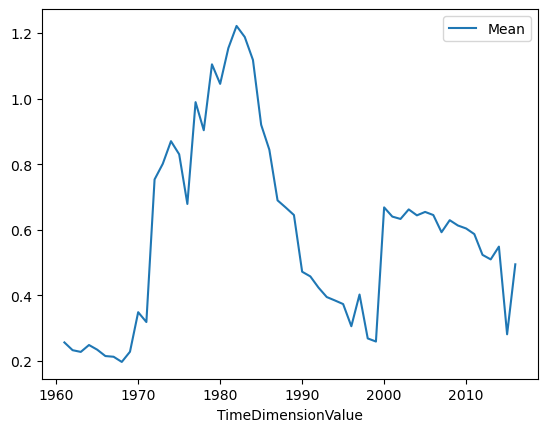

In [17]:
singleregion= stats[stats["ParentLocationCode"]=="EMR"][["Mean","TimeDimensionValue"]]  # selects just this country creates df,
pd.to_datetime(singleregion['TimeDimensionValue'], format='%Y') # convert the timedim from int ot date time

singleregion.plot(x="TimeDimensionValue", y="Mean")

plt.show()

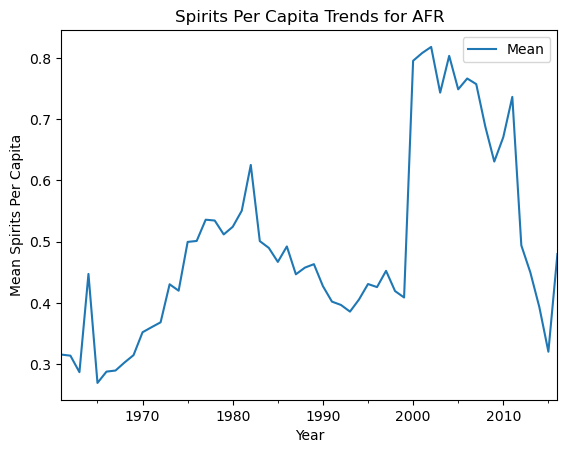

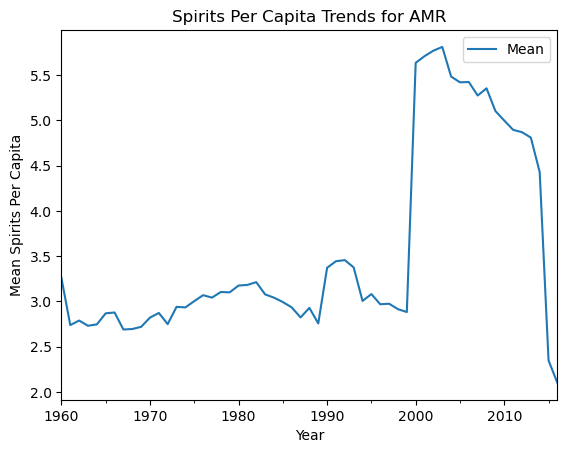

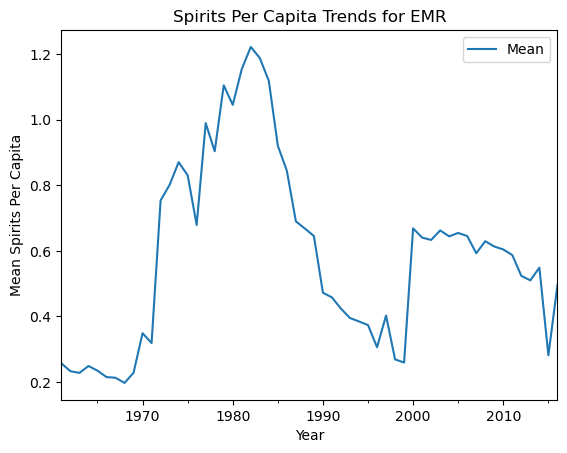

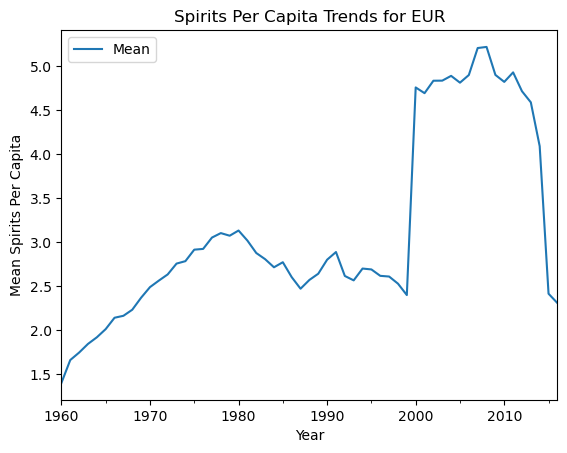

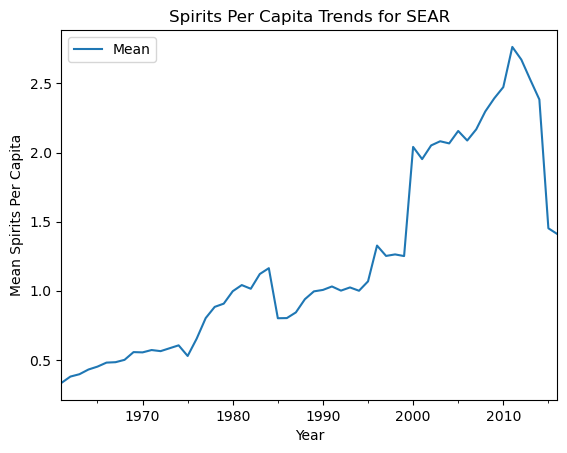

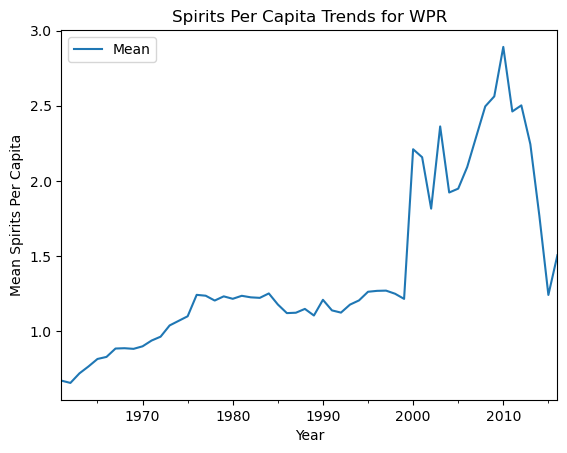

In [18]:
# Iterate through each region
for region in stats['ParentLocationCode'].unique():
    # Select data for the current region
    singleregion = stats[stats["ParentLocationCode"]==region][["Mean","TimeDimensionValue"]]
    
    # Convert the TimeDimensionValue to datetime
    singleregion['TimeDimensionValue'] = pd.to_datetime(singleregion['TimeDimensionValue'], format='%Y')
    
    # Plot the data
    singleregion.plot(x="TimeDimensionValue", y="Mean", title=f"Spirits Per Capita Trends for {region}", xlabel="Year", ylabel="Mean Spirits Per Capita")
    plt.show()

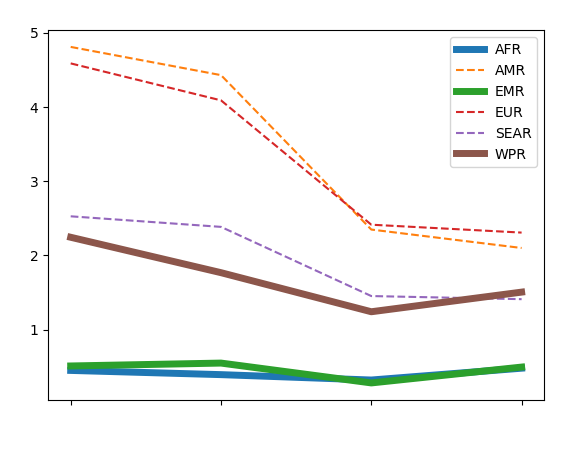

In [19]:
# Filter data for the years 2013 to 2016
data_1316 = stats[(stats['TimeDimensionValue'] >= 2013) & (stats['TimeDimensionValue'] <= 2016)]

# Iterate through each region
for region in data_1316['ParentLocationCode'].unique():
    # Select data for the current region
    singleregion = data_1316[data_1316["ParentLocationCode"]==region][["Mean","TimeDimensionValue"]]
    
    # Plot the data for the current region
    if region in ['WPR', 'EMR', 'AFR']:
        plt.plot(singleregion['TimeDimensionValue'], singleregion['Mean'], label=region, linewidth=5)  # Set bold line width for specific regions
    else:
        plt.plot(singleregion['TimeDimensionValue'], singleregion['Mean'], label=region, linestyle='--')  # Plot other regions as dotted lines

# Set labels and title
plt.xlabel('Year', color='white')  # Set xlabel color to white
plt.ylabel('Mean Spirits Per Capita', color='white')  # Set ylabel color to white
plt.title('Mean Spirits Per Capita Trends for Different Regions (2013-2016)', color='white')  # Set title color to white
plt.legend(labelcolor='black')  # Set legend text color to black

# Set background to transparent
plt.gcf().set_facecolor('none')
plt.gca().set_facecolor('none')
plt.grid(color='w', linestyle='--', linewidth=0.5)  # Set grid color to white

# Set tick color to white
plt.xticks(color='white')

# Set x ticks only at integer values
plt.xticks(range(int(min(data_1316['TimeDimensionValue'])), int(max(data_1316['TimeDimensionValue'])) + 1))

# Save the figure as PNG
plt.savefig('mean_spirits_per_capita.png', transparent=True)  # Set transparent background for PNG

# Show plot
plt.show()

In [20]:
# Filter the DataFrame to include only SPIRITS_PER_CAPITA data and data from 2013 to 2016
spirits_df = df[(df['TimeDimensionValue'] >= 2013) & (df['TimeDimensionValue'] <= 2016)][['ParentLocationCode', 'TimeDimensionValue', 'SPIRITS_PER_CAPITA']]

# Group the data by ParentLocationCode and TimeDimensionValue and apply aggregation functions
aggregated_df = spirits_df.groupby(['ParentLocationCode', 'TimeDimensionValue'], as_index=False)["SPIRITS_PER_CAPITA"].agg(Mean="mean", Total="sum", Count="count", Min="min", Max="max")

display(aggregated_df)

,ParentLocationCode,TimeDimensionValue,Mean,Total,Count,Min,Max
0,AFR,2013,0.450000,19.80,44,0.00,3.10
1,AFR,2014,0.393256,16.91,43,0.00,3.10
2,AFR,2015,0.320698,13.79,43,0.00,3.10
3,AFR,2016,0.480000,2.40,5,0.10,1.27
4,AMR,2013,4.808611,173.11,36,1.04,11.30
5,AMR,2014,4.428571,155.00,35,1.12,9.56
6,AMR,2015,2.347941,79.83,34,0.60,5.65
7,AMR,2016,2.099583,50.39,24,0.56,4.85
8,EMR,2013,0.510000,10.71,21,0.00,3.04
9,EMR,2014,0.548947,10.43,19,0.00,3.17


In [21]:




#
# plt.plot(stats['TimeDimensionValue'], stats['SPIRITS_PER_CAPITA'], label=country)

# # Set labels and title
# plt.xlabel('Year')
# plt.ylabel('Spirits Per Capita')
# plt.title('Spirits Per Capita Trends Over Time by Country (Excluding Zero Values), 1996 onwards')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# # Show plot
# plt.show()

In [22]:
# goal 1)-- find the fastest growing countries in the spirits space, plot their growth 
# goal 2)-- find the countries where spirits are drink of choice / least choice drink



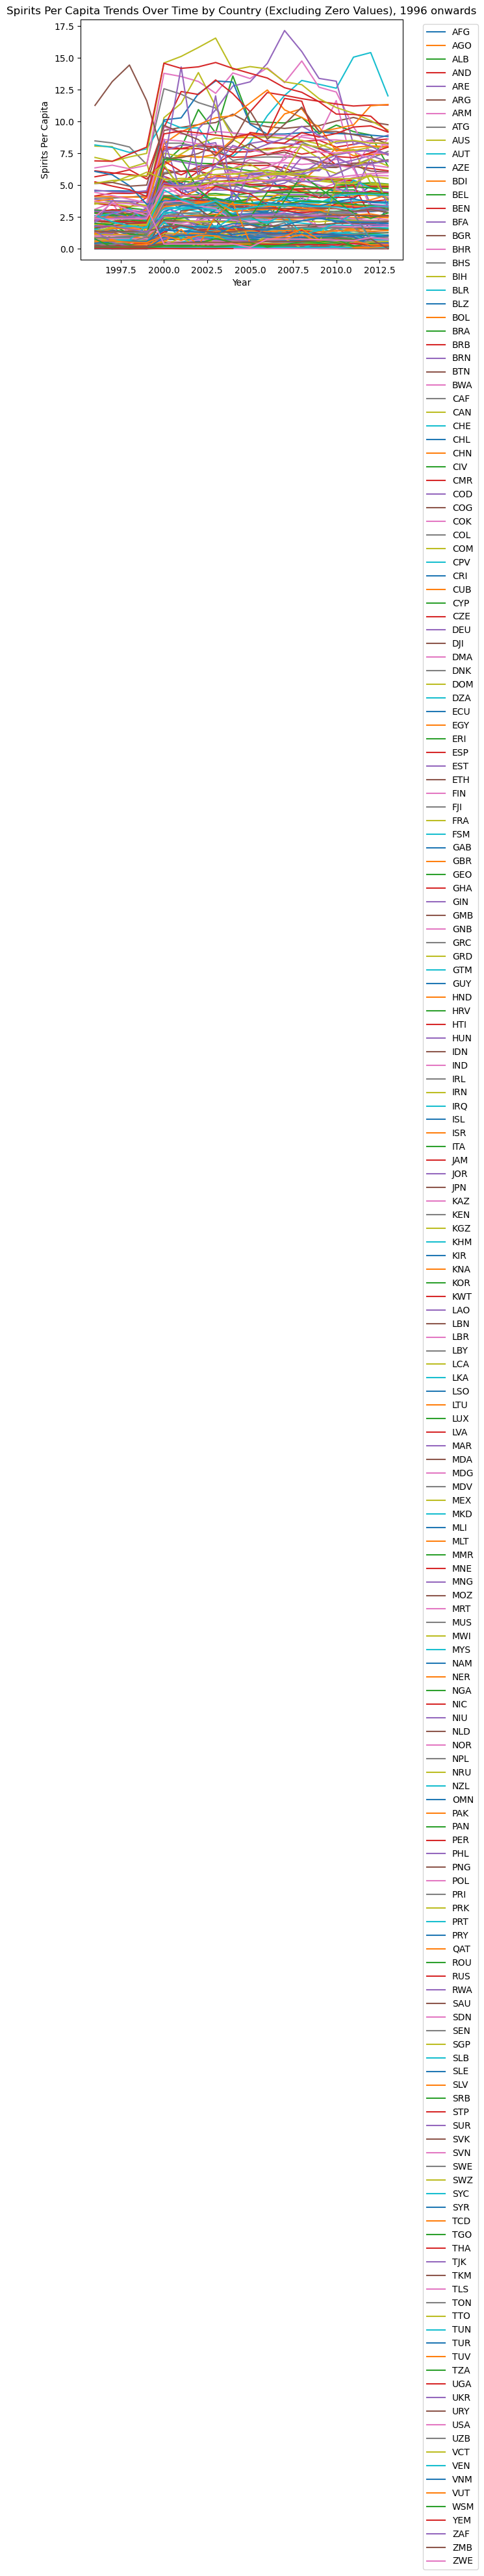

In [23]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./8_Per_Capita_Consumption_Not_Separated_by_Gender_1960_2016.csv')

# Filter the DataFrame to include only SPIRITS_PER_CAPITA data
spirits_df = df[['SpatialDim', 'TimeDim', 'SPIRITS_PER_CAPITA']]

# Filter the DataFrame to include only data from the year 1996 forward
spirits_df = spirits_df[(spirits_df['TimeDim'] >= 1996) & (spirits_df['TimeDim'] <= 2013)]


# Group the data by country and year, and calculate the mean spirits per capita
spirits_by_country = spirits_df.groupby(['SpatialDim', 'TimeDim']).mean().reset_index()

# Iterate over each unique country and plot its spirits per capita trend
for country in spirits_by_country['SpatialDim'].unique():
    country_data = spirits_by_country[(spirits_by_country['SpatialDim'] == country) & 
                                      (spirits_by_country['SPIRITS_PER_CAPITA'] != 0)]
    if not country_data.empty:
        plt.plot(country_data['TimeDim'], country_data['SPIRITS_PER_CAPITA'], label=country)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Spirits Per Capita')
plt.title('Spirits Per Capita Trends Over Time by Country (Excluding Zero Values), 1996 onwards')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show plot
plt.show()

In [24]:
#File is Price of Alcohol in 2012 
# Specify the file path
file_path2 = './3_df_3clean1_Price_of_Alcohol_2012.csv'

# Read the CSV file into a DataFrame
dfprice = pd.read_csv(file_path2)

# Calculate the average price of wine and beer
dfprice['WINE_BEER_AVG_PRICE'] = (dfprice['WINE_PRICE'] + dfprice['BEER_PRICE']) / 2

# Calculate the difference between the price of spirits and the average of wine and beer prices
dfprice['SPIRITS_WINE_BEER_DIFF'] = dfprice['SPIRITS_PRICE'] - dfprice['WINE_BEER_AVG_PRICE']

# Display the DataFrame with the new column
display(dfprice)


,SpatialDim,ParentLocationCode,TimeDim,TimeDimensionValue,SPIRITS_PRICE,BEER_PRICE,WINE_PRICE,WINE_BEER_AVG_PRICE,SPIRITS_WINE_BEER_DIFF
0,AFG,EMR,2012,2012,0.00,0.00,0.00,0.000,0.000
1,AGO,AFR,2012,2012,9.44,1.59,1.79,1.690,7.750
2,ALB,EUR,2012,2012,158.93,4.58,4.25,4.415,154.515
3,AND,EUR,2012,2012,11.89,1.22,7.86,4.540,7.350
4,ARE,EMR,2012,2012,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...
185,WSM,WPR,2012,2012,0.00,0.00,0.00,0.000,0.000
186,YEM,EMR,2012,2012,0.00,0.00,0.00,0.000,0.000
187,ZAF,AFR,2012,2012,36.09,0.90,2.02,1.460,34.630
188,ZMB,AFR,2012,2012,15.48,2.05,5.80,3.925,11.555


In [25]:
#@Sort and show the top 10 countries prices average price in USD 

# Sort the original DataFrame by SPIRITS_WINE_BEER_DIFF in descending order
sorted_df = dfprice.sort_values(by='SPIRITS_WINE_BEER_DIFF', ascending=False)

# Select the top 10 countries with the highest SPIRITS_WINE_BEER_DIFF
top_countries_df = sorted_df.head(10)

# Reset the index of the top_countries_df
top_countries_df.reset_index(drop=True, inplace=True)

# Display the top 10 countries DataFrame
print("Top 10 Countries with the Highest SPIRITS_WINE_BEER_DIFF:")
display(top_countries_df)

Top 10 Countries with the Highest SPIRITS_WINE_BEER_DIFF:


,SpatialDim,ParentLocationCode,TimeDim,TimeDimensionValue,SPIRITS_PRICE,BEER_PRICE,WINE_PRICE,WINE_BEER_AVG_PRICE,SPIRITS_WINE_BEER_DIFF
0,CHN,WPR,2012,2012,361.10,1.31,23.62,12.465,348.635
1,DZA,AFR,2012,2012,204.33,1.52,10.13,5.825,198.505
2,ALB,EUR,2012,2012,158.93,4.58,4.25,4.415,154.515
3,COM,AFR,2012,2012,115.11,3.49,4.22,3.855,111.255
4,IDN,SEAR,2012,2012,111.25,1.94,30.56,16.250,95.000
5,NOR,EUR,2012,2012,92.49,3.80,20.09,11.945,80.545
6,IND,SEAR,2012,2012,77.54,0.62,7.21,3.915,73.625
7,ISL,EUR,2012,2012,72.88,2.79,6.29,4.540,68.340
8,ARM,EUR,2012,2012,69.38,0.77,3.11,1.940,67.440
9,KIR,WPR,2012,2012,73.72,3.89,10.08,6.985,66.735


In [45]:
# Filter the DataFrame for AUS, CAN, and EST in the year 2012
pricetarget = dfprice[(dfprice['SpatialDim'].isin(['AUS', 'CAN', 'EST'])) & (dfprice['TimeDim'] == 2012)]

# Print the filtered DataFrame
display(pricetarget)

,SpatialDim,ParentLocationCode,TimeDim,TimeDimensionValue,SPIRITS_PRICE,BEER_PRICE,WINE_PRICE,WINE_BEER_AVG_PRICE,SPIRITS_WINE_BEER_DIFF
8,AUS,WPR,2012,2012,75.68,3.69,16.37,10.03,65.65
29,CAN,AMR,2012,2012,47.58,2.05,16.63,9.34,38.24
55,EST,EUR,2012,2012,36.57,1.13,5.53,3.33,33.24


In [26]:
#@Sort and show the bottom 10 countries prices average price in USD 

# Filter out rows where SPIRITS_PRICE is not zero
filtered_df = dfprice[dfprice['SPIRITS_PRICE'] != 0]

# Sort the filtered DataFrame by SPIRITS_WINE_BEER_DIFF in ascending order
sorted_df = filtered_df.sort_values(by='SPIRITS_WINE_BEER_DIFF', ascending=True)

# Select the bottom 10 countries with the lowest SPIRITS_WINE_BEER_DIFF
bottom_countries_df = sorted_df.head(10)

# Reset the index of the bottom_countries_df
bottom_countries_df.reset_index(drop=True, inplace=True)

The correlation between the price of spirits and the price of other alcohols is 0.243


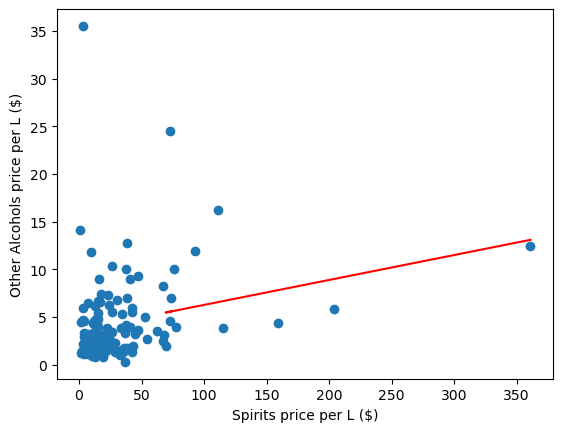

In [27]:
# Calculate the correlation coefficient and a linear regression model 

#Notes and checks to make sure everything is working:
    # for mouse weight and average observed tumor volume for the entire Capomulin regimen
    
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

    #display linregression from St to get the variables
    #display(st.linregress(avg_cap_vol["Weight (g)"],avg_cap_vol["Tumor Volume (mm3)"]))

    # cc= np.corrcoef(avg_cap_vol["Weight (g)"], avg_cap_vol["Tumor Volume (mm3)"])[0,1]
    # print(cc)


# #shows st.linear regression as variable values 
cslope, cintercept, crvalue, cpvalue, cstderr = st.linregress(sorted_df["SPIRITS_PRICE"], sorted_df["WINE_BEER_AVG_PRICE"])
crvalue = round(crvalue, 4)

print(f"The correlation between the price of spirits and the price of other alcohols is {crvalue}")

# Plot scatter plot
plt.scatter(sorted_df["SPIRITS_PRICE"], sorted_df["WINE_BEER_AVG_PRICE"])
plt.xlabel("Spirits price per L ($)")
plt.ylabel("Other Alcohols price per L ($)")

# Plot the line of best fit
cline = cslope * top_countries_df["SPIRITS_PRICE"] + cintercept
plt.plot(top_countries_df["SPIRITS_PRICE"], cline, color="r")

plt.show()

The correlation between the price of spirits and the price of other alcohols is 0.4616


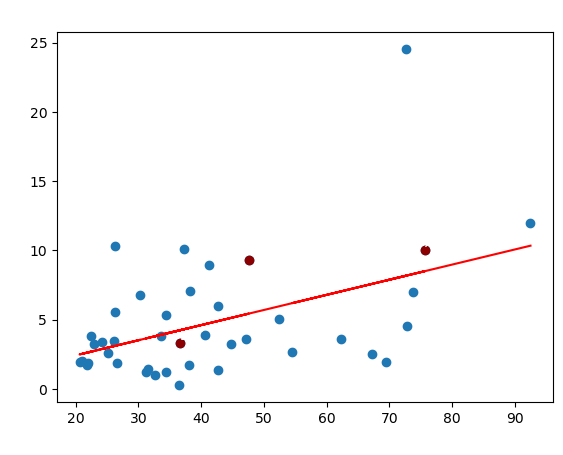

In [28]:
# Filter data for the specified parent location codes and within the range of >20 and <100
region_scatter = sorted_df[(sorted_df['ParentLocationCode'].isin(['WPR', 'AMR', 'EUR'])) & 
                            (sorted_df['SPIRITS_PRICE'] > 20) & 
                            (sorted_df['SPIRITS_PRICE'] < 100)]

# Calculate linear regression
cslope, cintercept, crvalue, cpvalue, cstderr = st.linregress(region_scatter["SPIRITS_PRICE"], region_scatter["WINE_BEER_AVG_PRICE"])
crvalue = round(crvalue, 4)

print(f"The correlation between the price of spirits and the price of other alcohols is {crvalue}")

# Plot scatter plot
plt.scatter(region_scatter["SPIRITS_PRICE"], region_scatter["WINE_BEER_AVG_PRICE"])

# Color the points representing AUS, EST, and CAN dark red and label them
aus_est_can = region_scatter[(region_scatter['SpatialDim'].isin(['AUS', 'EST', 'CAN']))]
for index, row in aus_est_can.iterrows():
    plt.scatter(row["SPIRITS_PRICE"], row["WINE_BEER_AVG_PRICE"], color='darkred')
    plt.text(row["SPIRITS_PRICE"], row["WINE_BEER_AVG_PRICE"], row["SpatialDim"], fontsize=9, color='white', ha='left', va='bottom')

plt.xlabel("Spirits price per L ($)", color='white')
plt.ylabel("Other Alcohols price per L ($)", color='white')
plt.title('Price of Spirits vs Other Alcohols by Country ($20-$100)', color='white')

# Set background to transparent
plt.gcf().set_facecolor('none')
plt.gca().set_facecolor('none')

# Set all labels, ticks, and lines to white
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Plot the line of best fit
cline = cslope * region_scatter["SPIRITS_PRICE"] + cintercept
plt.plot(region_scatter["SPIRITS_PRICE"], cline, color="r")

plt.show()

The correlation between the price of spirits and the price of other alcohols is 0.4616


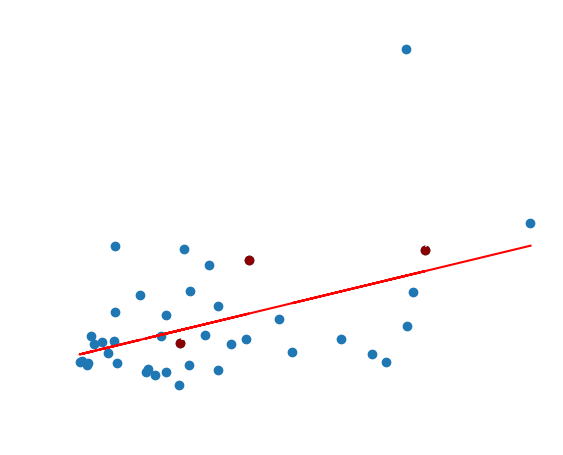

In [29]:
# Filter data for the specified parent location codes and within the range of >20 and <100
region_scatter = sorted_df[(sorted_df['ParentLocationCode'].isin(['WPR', 'AMR', 'EUR'])) & 
                            (sorted_df['SPIRITS_PRICE'] > 20) & 
                            (sorted_df['SPIRITS_PRICE'] < 100)]

# Calculate linear regression
cslope, cintercept, crvalue, cpvalue, cstderr = st.linregress(region_scatter["SPIRITS_PRICE"], region_scatter["WINE_BEER_AVG_PRICE"])
crvalue = round(crvalue, 4)

print(f"The correlation between the price of spirits and the price of other alcohols is {crvalue}")

# Plot scatter plot
plt.scatter(region_scatter["SPIRITS_PRICE"], region_scatter["WINE_BEER_AVG_PRICE"])

# Color the points representing AUS, EST, and CAN dark red and label them
aus_est_can = region_scatter[(region_scatter['SpatialDim'].isin(['AUS', 'EST', 'CAN']))]
for index, row in aus_est_can.iterrows():
    plt.scatter(row["SPIRITS_PRICE"], row["WINE_BEER_AVG_PRICE"], color='darkred')
    plt.text(row["SPIRITS_PRICE"], row["WINE_BEER_AVG_PRICE"], row["SpatialDim"], fontsize=9, color='white', ha='left', va='bottom')

plt.xlabel("Spirits price per L ($)", color='white')
plt.ylabel("Other Alcohols price per L ($)", color='white')
plt.title('Price of Spirits vs Other Alcohols by Country ($20-$100)', color='white')

# Set background to transparent
plt.gcf().set_facecolor('none')
plt.gca().set_facecolor('none')

# Set all labels, ticks, and lines to white
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Plot the line of best fit
cline = cslope * region_scatter["SPIRITS_PRICE"] + cintercept
plt.plot(region_scatter["SPIRITS_PRICE"], cline, color="r")

plt.savefig('spirits_v_other.png', transparent=True)  # Set transparent background for PNG

plt.show()

The correlation between the price of spirits and the price of other alcohols is 0.4616


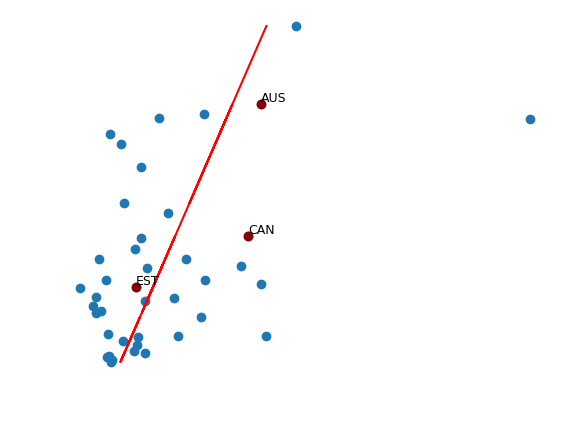

In [30]:
# Filter data for the specified parent location codes and within the range of >20 and <100
region_scatter = sorted_df[(sorted_df['ParentLocationCode'].isin(['WPR', 'AMR', 'EUR'])) & 
                            (sorted_df['SPIRITS_PRICE'] > 20) & 
                            (sorted_df['SPIRITS_PRICE'] < 100)]

# Calculate linear regression
cslope, cintercept, crvalue, cpvalue, cstderr = st.linregress(region_scatter["SPIRITS_PRICE"], region_scatter["WINE_BEER_AVG_PRICE"])
crvalue = round(crvalue, 4)

print(f"The correlation between the price of spirits and the price of other alcohols is {crvalue}")

# Plot scatter plot with flipped axes
plt.scatter(region_scatter["WINE_BEER_AVG_PRICE"], region_scatter["SPIRITS_PRICE"])  # Flipped axes

# Color the points representing AUS, EST, and CAN dark red and label them
aus_est_can = region_scatter[(region_scatter['SpatialDim'].isin(['AUS', 'EST', 'CAN']))]
for index, row in aus_est_can.iterrows():
    plt.scatter(row["WINE_BEER_AVG_PRICE"], row["SPIRITS_PRICE"], color='darkred')
    plt.text(row["WINE_BEER_AVG_PRICE"], row["SPIRITS_PRICE"], row["SpatialDim"], fontsize=9, color='black', ha='left', va='bottom')

plt.xlabel("Other Alcohols price per L ($)")
plt.ylabel("Spirits price per L ($)")  # Flipped labels

# Plot the line of best fit
cline = cslope * region_scatter["SPIRITS_PRICE"] + cintercept
plt.plot(cline, region_scatter["SPIRITS_PRICE"], color="r")  # Flipped line

plt.show()

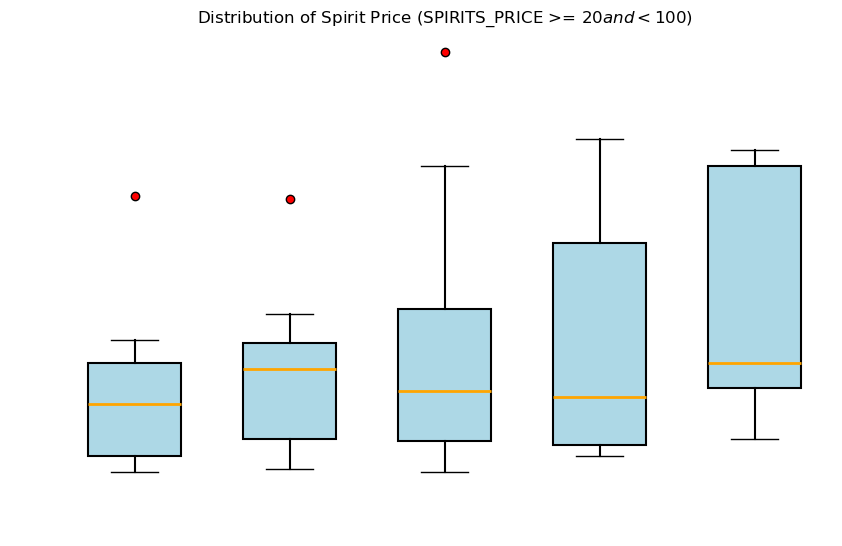

Outliers (SPIRITS_PRICE > $100):
[array([67.74]), array([67.25]), array([92.49]), array([], dtype=float64), array([], dtype=float64)]


In [31]:
# Generate box plot

# Drop rows with SPIRITS_PRICE below $20 and less than 100
dfprice_filtered = dfprice[(dfprice['SPIRITS_PRICE'] >= 20) & (dfprice['SPIRITS_PRICE'] < 100)]

# Group the data by ParentLocationCode
grouped_data = dfprice_filtered.groupby('ParentLocationCode')['SPIRITS_PRICE'].apply(list).reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot
box_plot = plt.boxplot(grouped_data['SPIRITS_PRICE'],
                        widths=0.6,
                        patch_artist=True,
                        boxprops=dict(linewidth=1.5, facecolor='lightblue'),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        medianprops=dict(color='orange', linewidth=2),
                        flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', alpha=1))

# Set plot title and labels
plt.title('Distribution of Spirit Price (SPIRITS_PRICE >= $20 and < $100)')
plt.xlabel('Region')
plt.ylabel('Spirit Price ($)')

# Customize x-axis tick labels
plt.xticks(ticks=range(1, len(grouped_data["ParentLocationCode"]) + 1), labels=grouped_data["ParentLocationCode"])

# Display grid
plt.grid(False)

# Show plot
plt.show()

# Extract outliers
outliers = [flier.get_ydata() for flier in box_plot['fliers']]
print("Outliers (SPIRITS_PRICE > $100):")
print(outliers)

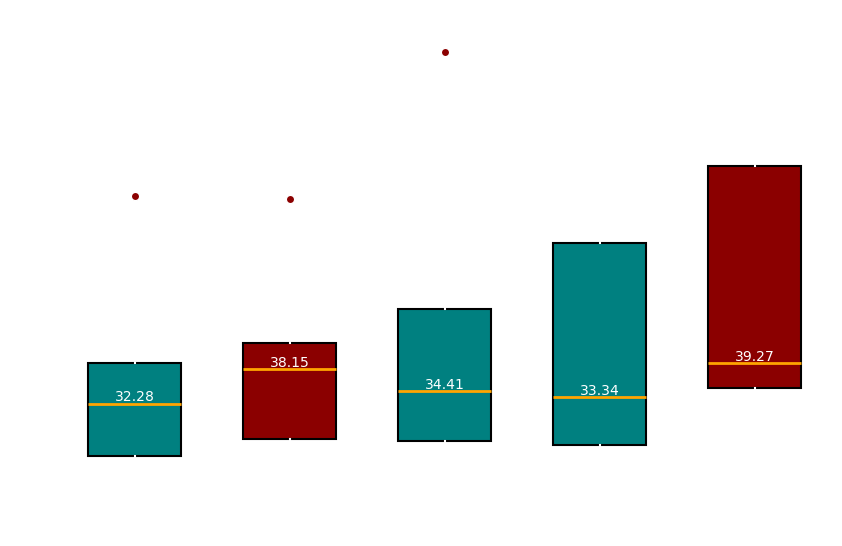

Outliers (SPIRITS_PRICE > $100):
[array([67.74]), array([67.25]), array([92.49]), array([], dtype=float64), array([], dtype=float64)]


In [46]:
# Drop rows with SPIRITS_PRICE below $20 and less than 100
dfprice_filtered = dfprice[(dfprice['SPIRITS_PRICE'] >= 20) & (dfprice['SPIRITS_PRICE'] < 100)]

# Group the data by ParentLocationCode
grouped_data = dfprice_filtered.groupby('ParentLocationCode')['SPIRITS_PRICE'].apply(list).reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot
box_plot = plt.boxplot(grouped_data['SPIRITS_PRICE'],
                        widths=0.6,
                        patch_artist=True,
                        boxprops=dict(linewidth=1.5, facecolor='lightblue'),
                        whiskerprops=dict(color='white', linewidth=1.5),  # Set whisker lines to white
                        capprops=dict(color='white', linewidth=1.5),  # Set max and min lines to white
                        medianprops=dict(color='orange', linewidth=2),
                        flierprops=dict(marker='o', markerfacecolor='darkred', markeredgecolor='white', alpha=1))

# Customize box colors
colors = ['teal' if region not in ['WPR', 'AMR'] else 'darkred' for region in grouped_data['ParentLocationCode']]
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Set plot title and labels
plt.title('Distribution of Spirit Price (SPIRITS_PRICE >= $20 and < $100)', color='white')
plt.xlabel('Region', color='white')
plt.ylabel('Spirit Price ($)', color='white')

# Customize x-axis tick labels
plt.xticks(ticks=range(1, len(grouped_data["ParentLocationCode"]) + 1), labels=grouped_data["ParentLocationCode"], color='white')
plt.yticks(color='white')

# Set background to transparent
plt.gcf().set_facecolor('none')
plt.gca().set_facecolor('none')

# Set all ticks and lines to white
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Label median prices
medians = [median.get_ydata()[0] for median in box_plot['medians']]
for i, median in enumerate(medians):
    plt.text(i + 1, median, f'{median:.2f}', ha='center', va='bottom', color='white')

# Display grid
plt.grid(False)

plt.savefig('regional_median.png', transparent=True)  # Set transparent background for PNG

# Show plot
plt.show()


# Extract outliers
outliers = [flier.get_ydata() for flier in box_plot['fliers']]
print("Outliers (SPIRITS_PRICE > $100):")
print(outliers)

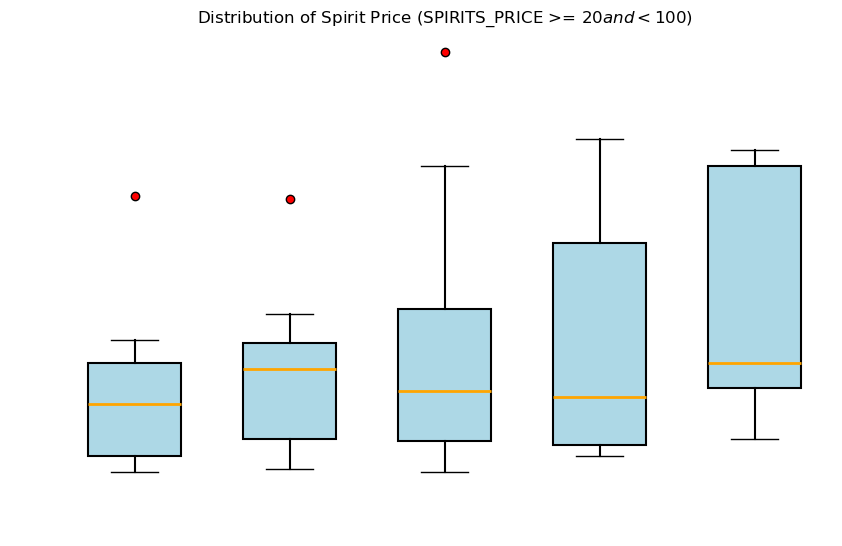

Outliers (SPIRITS_PRICE > $100):
Location Code: AFR, Value: 67.74
Location Code: AMR, Value: 67.25
Location Code: EUR, Value: 92.49


In [33]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot
box_plot = plt.boxplot(grouped_data['SPIRITS_PRICE'],
                        widths=0.6,
                        patch_artist=True,
                        boxprops=dict(linewidth=1.5, facecolor='lightblue'),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        medianprops=dict(color='orange', linewidth=2),
                        flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', alpha=1))

# Set plot title and labels
plt.title('Distribution of Spirit Price (SPIRITS_PRICE >= $20 and < $100)')
plt.xlabel('Country')
plt.ylabel('Spirit Price ($)')

# Customize x-axis tick labels
plt.xticks(ticks=range(1, len(grouped_data["ParentLocationCode"]) + 1), labels=grouped_data["ParentLocationCode"])

# Display grid
plt.grid(False)

# Show plot
plt.show()

# Extract outliers with their ParentLocationCode and value
outliers = []
for i, flier in enumerate(box_plot['fliers']):
    y_data = flier.get_ydata()
    if len(y_data) > 0:
        for value in y_data:
            outliers.append((grouped_data["ParentLocationCode"][i], value))

print("Outliers (SPIRITS_PRICE > $100):")
for loc_code, value in outliers:
    print(f"Location Code: {loc_code}, Value: {value}")

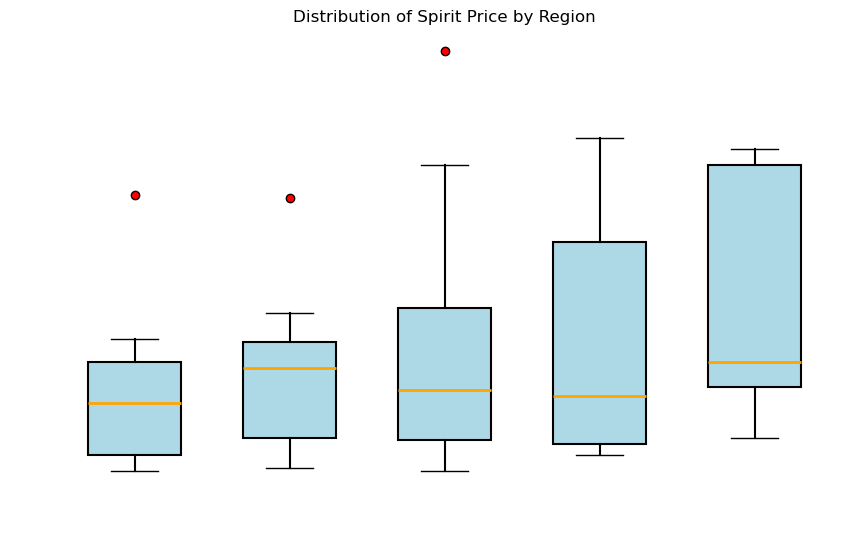

Outliers (SPIRITS_PRICE > $100):
Parent Location Code: AFR, Spatial Dimension: CAF, Value: 67.74
Parent Location Code: AMR, Spatial Dimension: ARG, Value: 67.25
Parent Location Code: EUR, Spatial Dimension: ARM, Value: 92.49


In [34]:
# Drop rows with SPIRITS_PRICE below $20 and less than 100
dfprice_filtered = dfprice[(dfprice['SPIRITS_PRICE'] >= 20) & (dfprice['SPIRITS_PRICE'] < 100)]

# Group the data by ParentLocationCode
grouped_data = dfprice_filtered.groupby('ParentLocationCode')['SPIRITS_PRICE'].apply(list).reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot
box_plot = plt.boxplot(grouped_data['SPIRITS_PRICE'],
                        widths=0.6,
                        patch_artist=True,
                        boxprops=dict(linewidth=1.5, facecolor='lightblue'),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        medianprops=dict(color='orange', linewidth=2),
                        flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', alpha=1))

# Set plot title and labels
plt.title('Distribution of Spirit Price by Region')
plt.xlabel('Country')
plt.ylabel('Spirit Price ($)')

# Customize x-axis tick labels
plt.xticks(ticks=range(1, len(grouped_data["ParentLocationCode"]) + 1), labels=grouped_data["ParentLocationCode"])

# Display grid
plt.grid(False)

# Show plot
plt.show()

# Extract outliers with their ParentLocationCode, corresponding SpatialDim, and value
outliers = []
for i, flier in enumerate(box_plot['fliers']):
    y_data = flier.get_ydata()
    if len(y_data) > 0:
        parent_location_code = grouped_data["ParentLocationCode"][i]
        spatial_dim = dfprice_filtered[dfprice_filtered['ParentLocationCode'] == parent_location_code]['SpatialDim'].iloc[0]
        for value in y_data:
            outliers.append((parent_location_code, spatial_dim, value))

print("Outliers (SPIRITS_PRICE > $100):")
for parent_location_code, spatial_dim, value in outliers:
    print(f"Parent Location Code: {parent_location_code}, Spatial Dimension: {spatial_dim}, Value: {value}")

In [35]:
grouped_data.describe()

,ParentLocationCode,SPIRITS_PRICE
count,5,5
unique,5,5
top,AFR,"[28.78, 23.97, 21.58, 67.74, 20.63000000000000..."
freq,1,1


In [36]:
# Calculate upper and lower quantiles for each region
upper_quantiles = grouped_data['SPIRITS_PRICE'].apply(lambda x: pd.Series(x).quantile(0.75))
lower_quantiles = grouped_data['SPIRITS_PRICE'].apply(lambda x: pd.Series(x).quantile(0.25))

# Display upper and lower quantiles for each region
for idx, row in grouped_data.iterrows():
    print(f"Region: {row['ParentLocationCode']}")
    print(f"Upper Quantile: {upper_quantiles[idx]}")
    print(f"Lower Quantile: {lower_quantiles[idx]}\n")

Region: AFR
Upper Quantile: 39.277499999999996
Lower Quantile: 23.3725

Region: AMR
Upper Quantile: 42.61
Lower Quantile: 26.26

Region: EUR
Upper Quantile: 48.4575
Lower Quantile: 25.807500000000005

Region: SEAR
Upper Quantile: 59.795
Lower Quantile: 25.200000000000003

Region: WPR
Upper Quantile: 72.9025
Lower Quantile: 34.9575



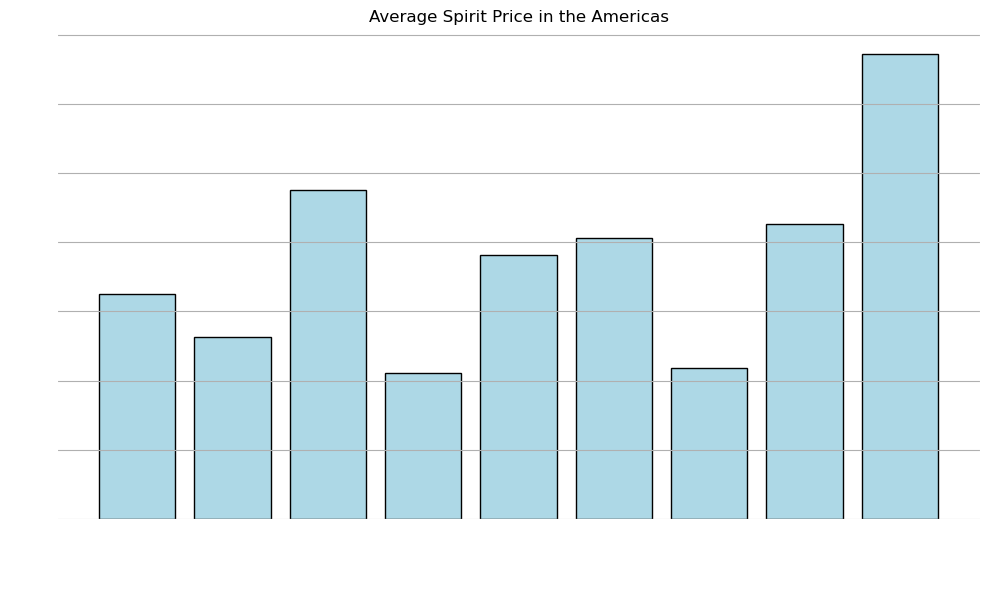

In [37]:
# Filter data for 'AMR' parent location code
amr_data = dfprice_filtered[dfprice_filtered['ParentLocationCode'] == 'AMR']

# Group the filtered data by SpatialDim
grouped_amr_data = amr_data.groupby('SpatialDim')['SPIRITS_PRICE'].mean().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar graph for 'AMR' region
x = np.arange(len(grouped_amr_data))
plt.bar(x, grouped_amr_data['SPIRITS_PRICE'], color='lightblue', edgecolor='black')

# Set plot title and labels
plt.title('Average Spirit Price in the Americas')
plt.xlabel('country')
plt.ylabel('Average Spirit Price ($)')

# Customize x-axis tick labels
plt.xticks(ticks=x, labels=grouped_amr_data['SpatialDim'], rotation=45)

# Display grid
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

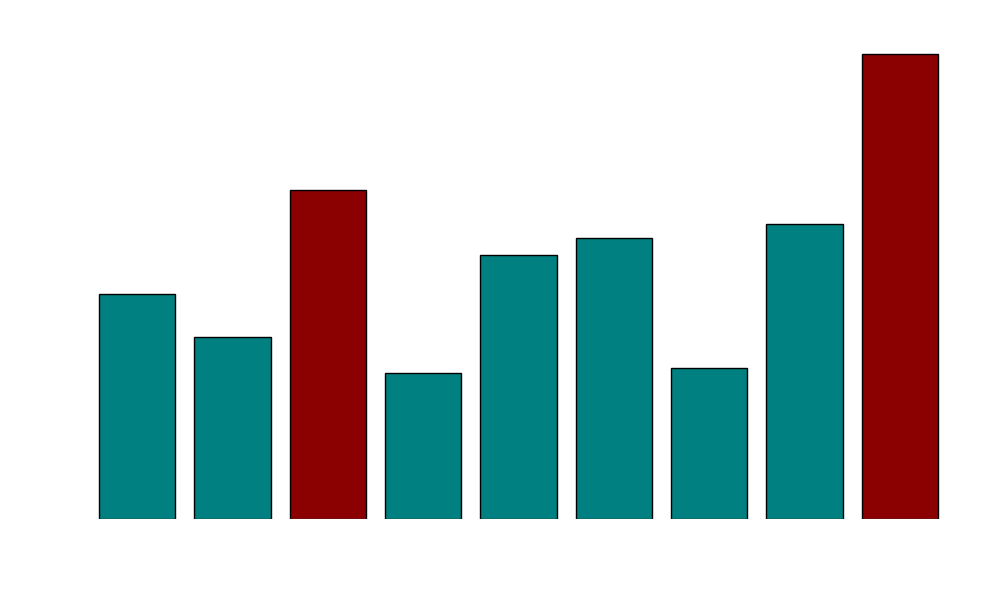

In [50]:
# Filter data for 'AMR' parent location code
amr_data = dfprice_filtered[dfprice_filtered['ParentLocationCode'] == 'AMR']

# Group the filtered data by SpatialDim
grouped_amr_data = amr_data.groupby('SpatialDim')['SPIRITS_PRICE'].mean().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar graph for 'AMR' region
x = np.arange(len(grouped_amr_data))
colors = ['darkred' if country == 'CAN' or country == 'VEN' else 'teal' for country in grouped_amr_data['SpatialDim']]
bars = plt.bar(x, grouped_amr_data['SPIRITS_PRICE'], color=colors, edgecolor='black')

# Set plot title and labels
plt.title('Average Spirit Price in the Americas', color='white')
plt.xlabel('Country', color='white')
plt.ylabel('Average Spirit Price ($)', color='white')

# Customize x-axis tick labels
plt.xticks(ticks=x, labels=grouped_amr_data['SpatialDim'], rotation=45, color='white')
plt.yticks(color='white')

# Set background to transparent
plt.gcf().set_facecolor('none')
plt.gca().set_facecolor('none')

# Set all ticks and lines to white
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Label the price on CAN and VEN bars
for i, bar in enumerate(bars):
    if grouped_amr_data.loc[i, 'SpatialDim'] in ['CAN', 'VEN']:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{grouped_amr_data.loc[i, 'SPIRITS_PRICE']:.2f}",
                 ha='center', va='bottom', color='white')

# Save the figure
plt.tight_layout()
plt.savefig('average_spirit_price_americas.png', transparent=True)

# Show plot
plt.show()

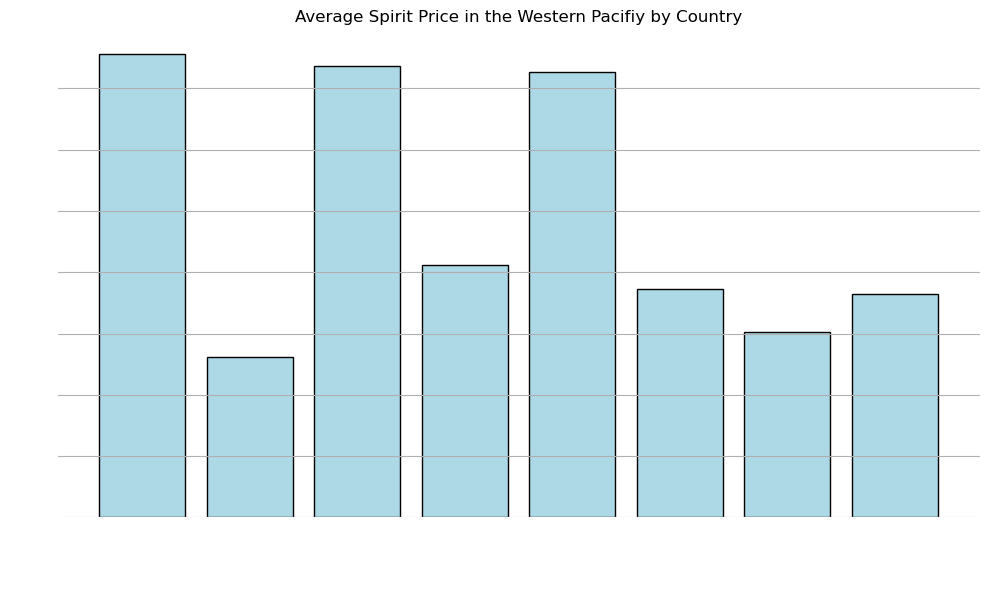

In [38]:
# Filter data for 'WPR' parent location code
wpr_data = dfprice_filtered[dfprice_filtered['ParentLocationCode'] == 'WPR']

# Group the filtered data by SpatialDim
grouped_wpr_data = wpr_data.groupby('SpatialDim')['SPIRITS_PRICE'].mean().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar graph for 'WPR' region
x = np.arange(len(grouped_wpr_data))
plt.bar(x, grouped_wpr_data['SPIRITS_PRICE'], color='lightblue', edgecolor='black')

# Set plot title and labels
plt.title('Average Spirit Price in the Western PacifiC')
plt.xlabel('Spatial Dimension')
plt.ylabel('Average Spirit Price ($)')

# Customize x-axis tick labels
plt.xticks(ticks=x, labels=grouped_wpr_data['SpatialDim'], rotation=45)

# Display grid
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

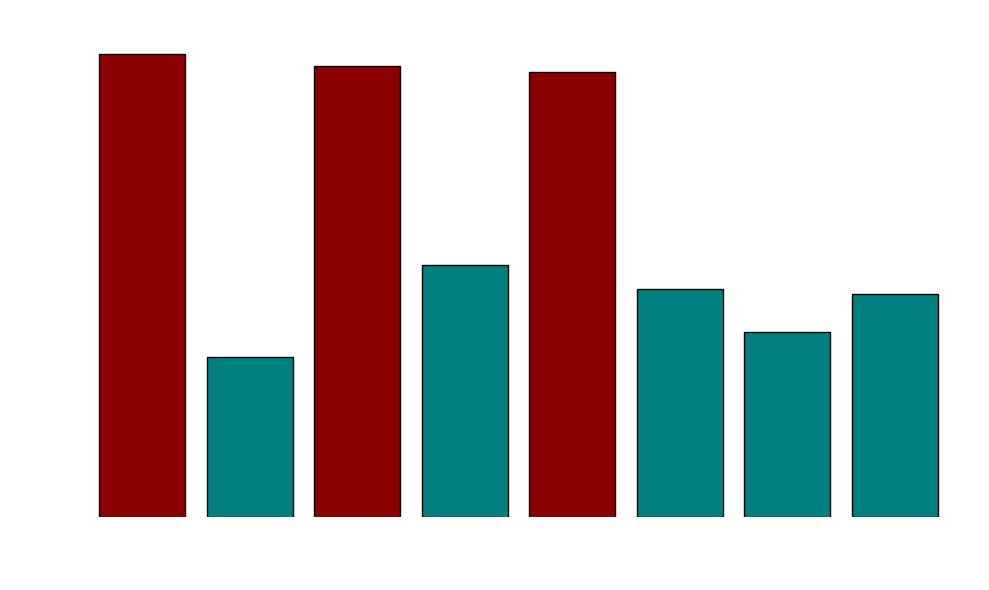

In [52]:
# Filter data for 'WPR' parent location code
wpr_data = dfprice_filtered[dfprice_filtered['ParentLocationCode'] == 'WPR']

# Group the filtered data by SpatialDim
grouped_wpr_data = wpr_data.groupby('SpatialDim')['SPIRITS_PRICE'].mean().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar graph for 'WPR' region
x = np.arange(len(grouped_wpr_data))
colors = ['darkred' if country in grouped_wpr_data.nlargest(3, 'SPIRITS_PRICE')['SpatialDim'].values else 'teal' for country in grouped_wpr_data['SpatialDim']]
bars = plt.bar(x, grouped_wpr_data['SPIRITS_PRICE'], color=colors, edgecolor='black')

# Set plot title and labels
plt.title('Average Spirit Price in the Western Pacific', color='white')
plt.xlabel('Spatial Dimension', color='white')
plt.ylabel('Average Spirit Price ($)', color='white')

# Customize x-axis tick labels
plt.xticks(ticks=x, labels=grouped_wpr_data['SpatialDim'], rotation=45, color='white')
plt.yticks(color='white')

# Set background to transparent
plt.gcf().set_facecolor('none')
plt.gca().set_facecolor('none')

# Set all ticks and lines to white
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Remove grid lines
plt.grid(False)

# Label the top 3 bars
top_3 = grouped_wpr_data.nlargest(3, 'SPIRITS_PRICE')
for i, bar in top_3.iterrows():
    plt.text(i, bar['SPIRITS_PRICE'], f"{bar['SPIRITS_PRICE']:.2f}", ha='center', va='bottom', color='white')

# Save the figure
plt.tight_layout()
plt.savefig('average_spirit_price_western_pacific.png', transparent=True)

# Show plot
plt.show()

In [39]:
# AMR-- Venezuela, Canada // WPR-- AUS, KIR, MYS highest pricing how to show the relationship between beer/wine totals and spirits totals? 

# how to show a bubble graph 